In [1]:
!pip install seaborn
!pip install matplotlib

DEPRECATION: Loading egg at d:\bhavesh\ml_project\spam_detection_project\venv\lib\site-packages\fault_detection-1.0.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


DEPRECATION: Loading egg at d:\bhavesh\ml_project\spam_detection_project\venv\lib\site-packages\fault_detection-1.0.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# import required libraries

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
file_path = r"wafer_23012020_041211.csv"
wafers = pd.read_csv(file_path)
print("shape of the feature store dataset:" , wafers.shape)
wafers.head()

shape of the feature store dataset: (100, 592)


,Unnamed: 0,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,Wafer-801,2968.33,2476.58,2216.7333,1748.0885,1.1127,100.0,97.5822,0.1242,1.5300,...,NaN,0.5004,0.0120,0.0033,2.4069,0.0545,0.0184,0.0055,33.7876,-1
1,Wafer-802,2961.04,2506.43,2170.0666,1364.5157,1.5447,100.0,96.7700,0.1230,1.3953,...,NaN,0.4994,0.0115,0.0031,2.3020,0.0545,0.0184,0.0055,33.7876,1
2,Wafer-803,3072.03,2500.68,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.3896,...,NaN,0.4987,0.0118,0.0036,2.3719,0.0545,0.0184,0.0055,33.7876,-1
3,Wafer-804,3021.83,2419.83,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.4108,...,NaN,0.4934,0.0123,0.0040,2.4923,0.0545,0.0184,0.0055,33.7876,-1
4,Wafer-805,3006.95,2435.34,2189.8111,1084.6502,1.1993,100.0,104.8856,0.1234,1.5094,...,NaN,0.4987,0.0145,0.0041,2.8991,0.0545,0.0184,0.0055,33.7876,-1


In [4]:
wafers.drop(columns={"Unnamed: 0", 'Good/Bad'}).iloc[:100].to_csv("test.csv",index = False)

In [5]:
#replace the columns unnamed:0 as wafer
wafers.rename(columns={"Unnamed: 0": "Wafer"},inplace=True)

In [6]:
!pip install -U scikit-learn

DEPRECATION: Loading egg at d:\bhavesh\ml_project\spam_detection_project\venv\lib\site-packages\fault_detection-1.0.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
##Train-Test-Spilt
from sklearn.model_selection import train_test_split
wafers , wafers_test = train_test_split(wafers,test_size = 0.20 , random_state=42)

In [8]:
## wafers INfo

In [9]:
wafers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 55 to 51
Columns: 592 entries, Wafer to Good/Bad
dtypes: float64(494), int64(97), object(1)
memory usage: 370.6+ KB


In [10]:
#Description of wafers
wafers.describe()

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
count,79.000000,80.000000,78.000000,78.000000,78.000000,78.0,78.000000,78.000000,80.000000,80.000000,...,27.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,3019.048228,2494.058875,2202.758988,1519.467071,1.201382,100.0,96.881160,0.122158,1.460087,0.000946,...,63.785093,0.499493,0.013905,0.003591,2.785103,0.023543,0.014155,0.004439,72.116730,-0.850000
std,72.665372,68.166898,31.633772,471.962104,0.365870,0.0,5.520108,0.002062,0.072159,0.010865,...,30.722790,0.003683,0.004577,0.000908,0.923064,0.011668,0.007263,0.002324,50.770394,0.530106
min,2889.670000,2254.990000,2114.666700,978.783200,0.753100,100.0,83.423300,0.116000,1.317900,-0.026500,...,20.309100,0.492500,0.007600,0.002100,1.515200,0.009900,0.004800,0.001700,20.309100,-1.000000
25%,2975.425000,2452.517500,2189.966700,1111.543600,0.850075,100.0,93.547250,0.120800,1.409950,-0.005750,...,46.961400,0.497175,0.011500,0.003100,2.298350,0.013850,0.009000,0.002650,33.654025,-1.000000
50%,3004.390000,2502.445000,2200.955600,1308.647900,1.164250,100.0,99.217800,0.122150,1.451900,0.001500,...,54.476100,0.499450,0.012950,0.003400,2.577150,0.021800,0.013100,0.003800,59.082500,-1.000000
75%,3065.730000,2532.755000,2212.866700,1997.641600,1.383000,100.0,101.133300,0.123375,1.498675,0.009000,...,80.740300,0.501700,0.014950,0.003925,2.992300,0.028100,0.018400,0.005750,93.190025,-1.000000
max,3221.210000,2664.520000,2315.266700,2363.641200,2.207300,100.0,103.091100,0.126200,1.641100,0.025000,...,151.193000,0.508700,0.043700,0.008900,8.816000,0.054500,0.033400,0.012000,223.101800,1.000000


## From the list of only shown columns. it looks like some of features have pretty bad outliers. one thing is for sure . the data must be standardized

In [11]:
## Looking at the Cats in our Target feature
wafers["Good/Bad"].value_counts()

Good/Bad
-1    74
 1     6
Name: count, dtype: int64

### insight
Heavily imbalanced Definitely gonna need resampling.

# Analyze Missing Data:

Firstly we'll check the missinng data in the target feature and drop those records. AS if we already know a value of target feature then there's no need for a ML algorithim, damn right? Therefore, the best way to deal with missing target entries is to delete them. For other missing features , we can definitely use impute stratrgies.

In [12]:
# check Missing vals in target feature
wafers["Good/Bad"].isna().sum()

np.int64(0)

=> Woa, not even a single misssing entry. i didn't see that coming.

In [13]:
wafers.isna().sum().sum()

np.int64(1822)

In [14]:
## Check missing vals in dependent feature variables
wafers.isna().sum().sum() / (wafers.shape[0] * (wafers.shape[1] - 1))

np.float64(0.038536379018612524)

=> Almost 4% out of total cells we're having are missing.
We're gonna try all sort of imputation strategies and would choose the one with that's gonna give us least overall-error-val

In [15]:
# Visualization of Sensors distribution:


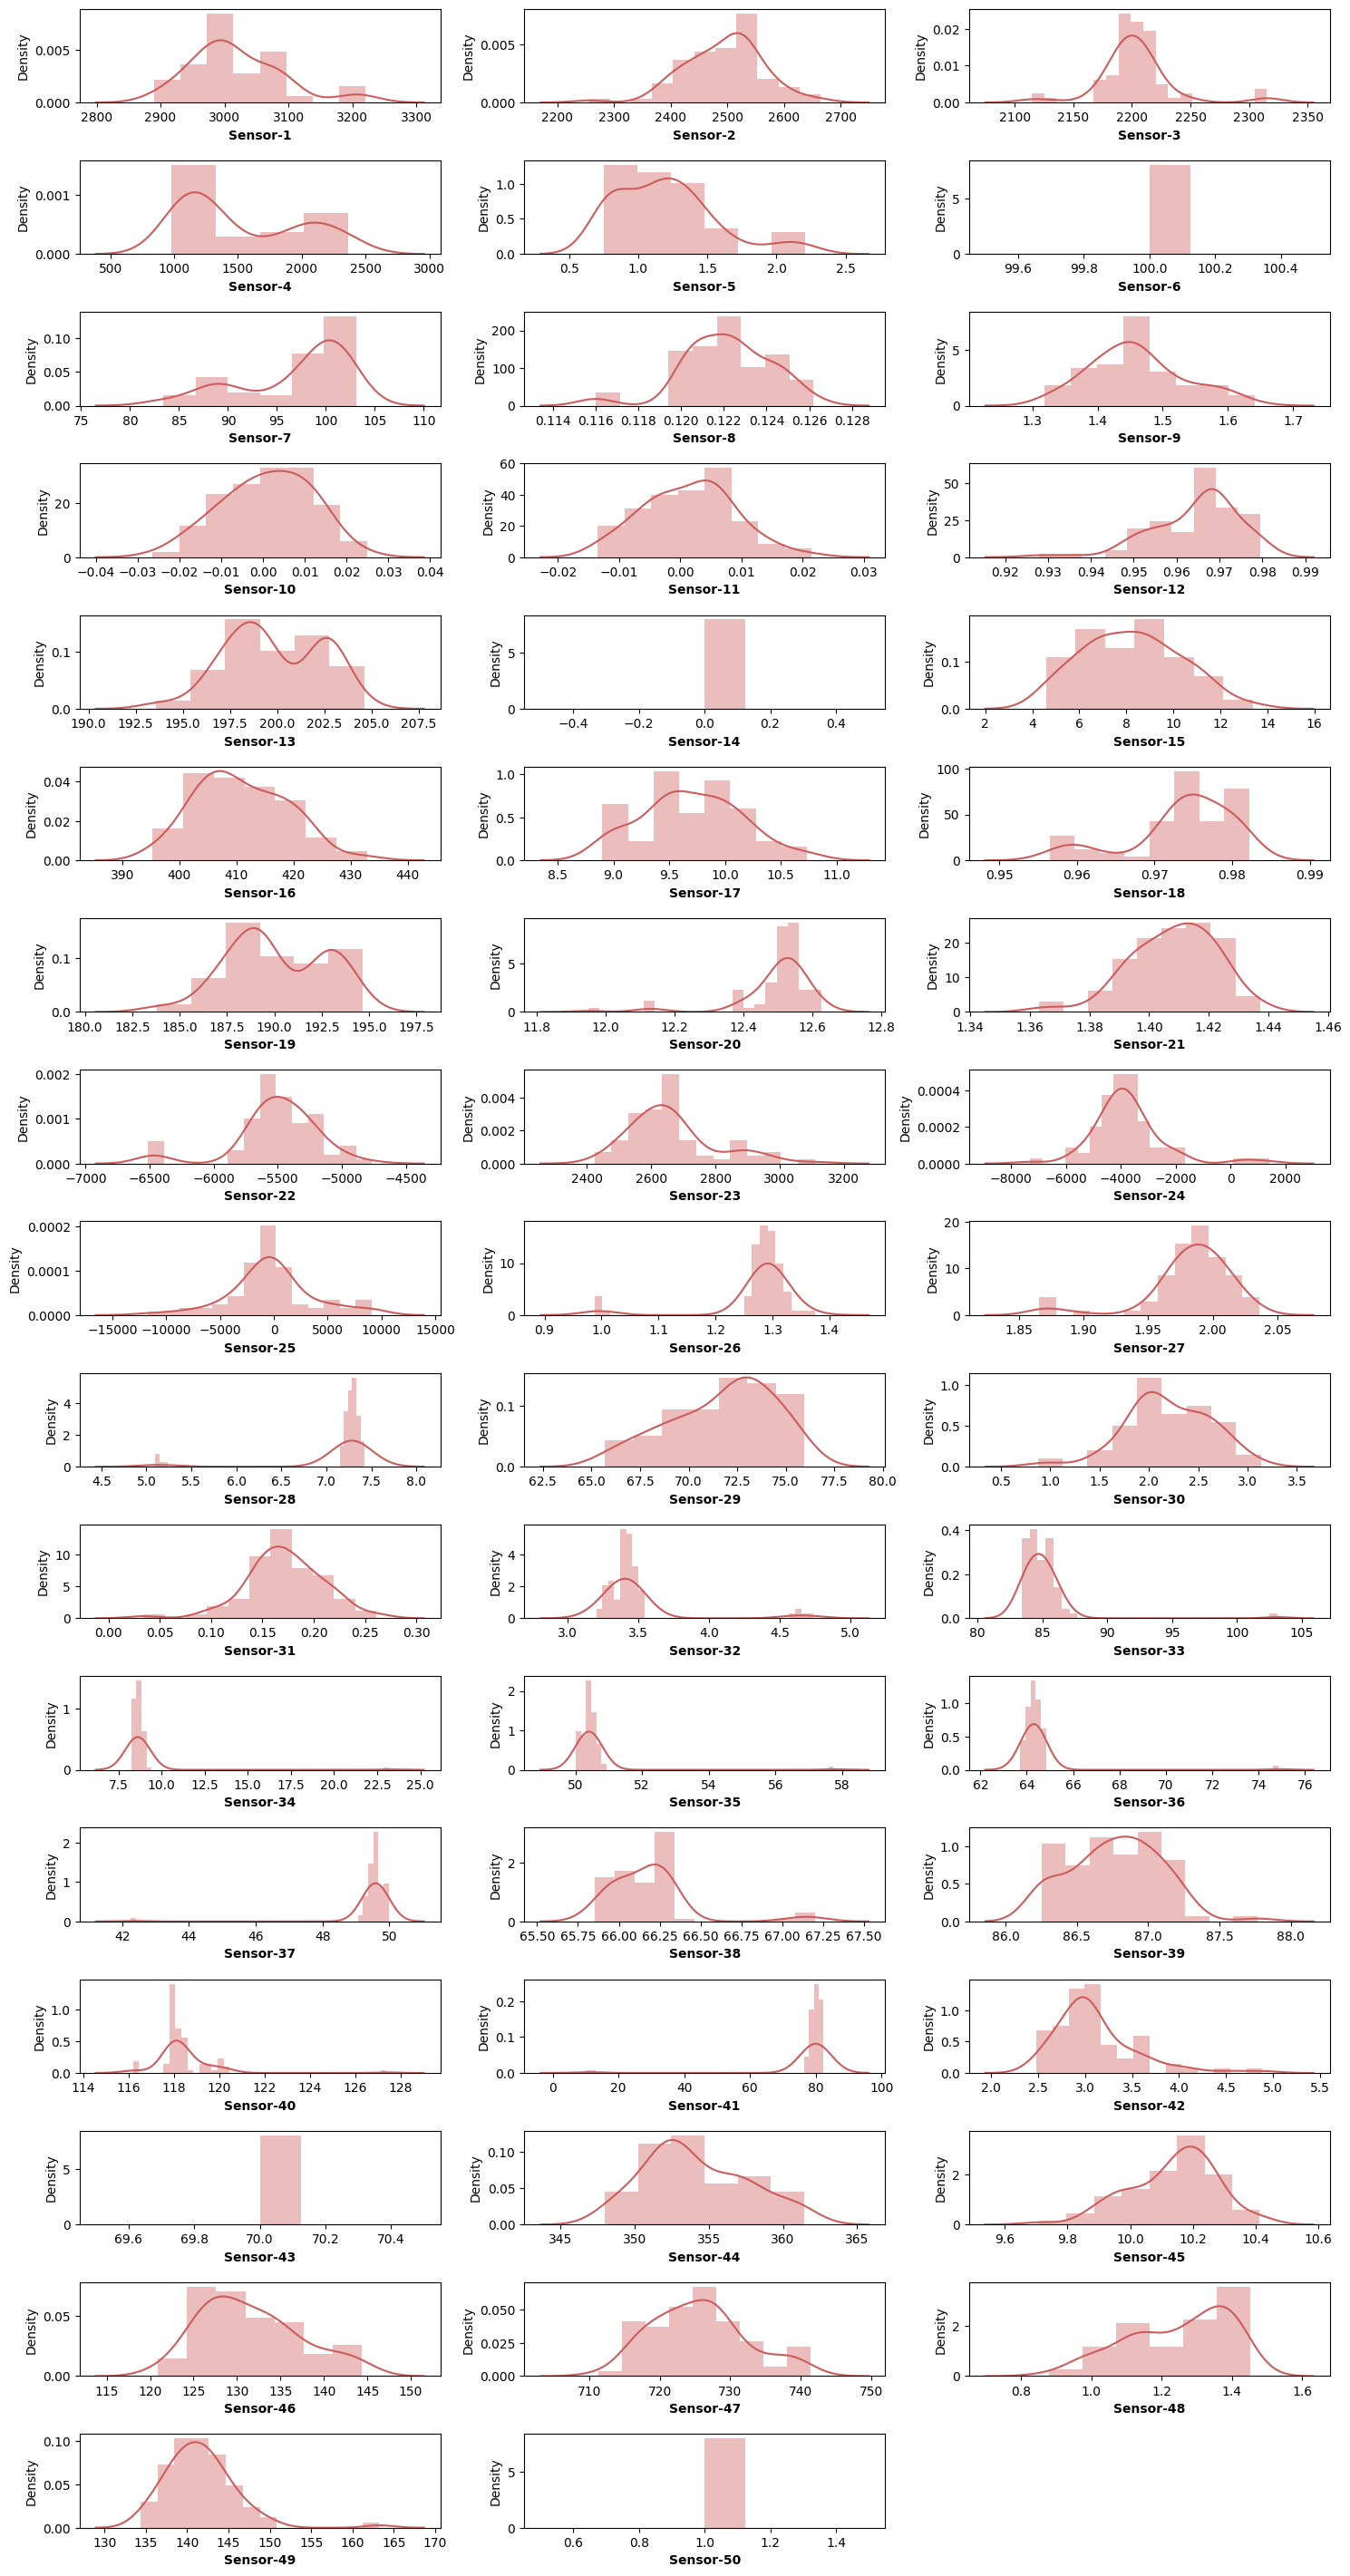

In [16]:
# let's have a look at the distribution  first 50 sensors of wafers
plt.figure(figsize=(15,100))

for i,col in enumerate(wafers.columns[1:51]):
    plt.subplot(60,3,i+1)
    sns.distplot(x=wafers[col], color='indianred')
    plt.xlabel(col,weight='bold')
    plt.tight_layout()

In [17]:
#select 50 random sensors

random_50_sensors_idx = []
for i in range (50):
    if i not in random_50_sensors_idx:
        random_50_sensors_idx.append(np.random.randint(1,591))


random_50_sensors_idx

[539,
 35,
 266,
 216,
 343,
 40,
 547,
 101,
 186,
 515,
 70,
 106,
 212,
 60,
 436,
 376,
 79,
 549,
 104,
 55,
 283,
 432,
 272,
 227,
 96,
 333,
 85,
 507,
 136,
 10,
 556,
 565,
 91,
 440,
 526,
 221,
 172,
 538,
 222,
 461,
 81,
 100,
 556,
 358,
 505,
 108,
 382,
 245]

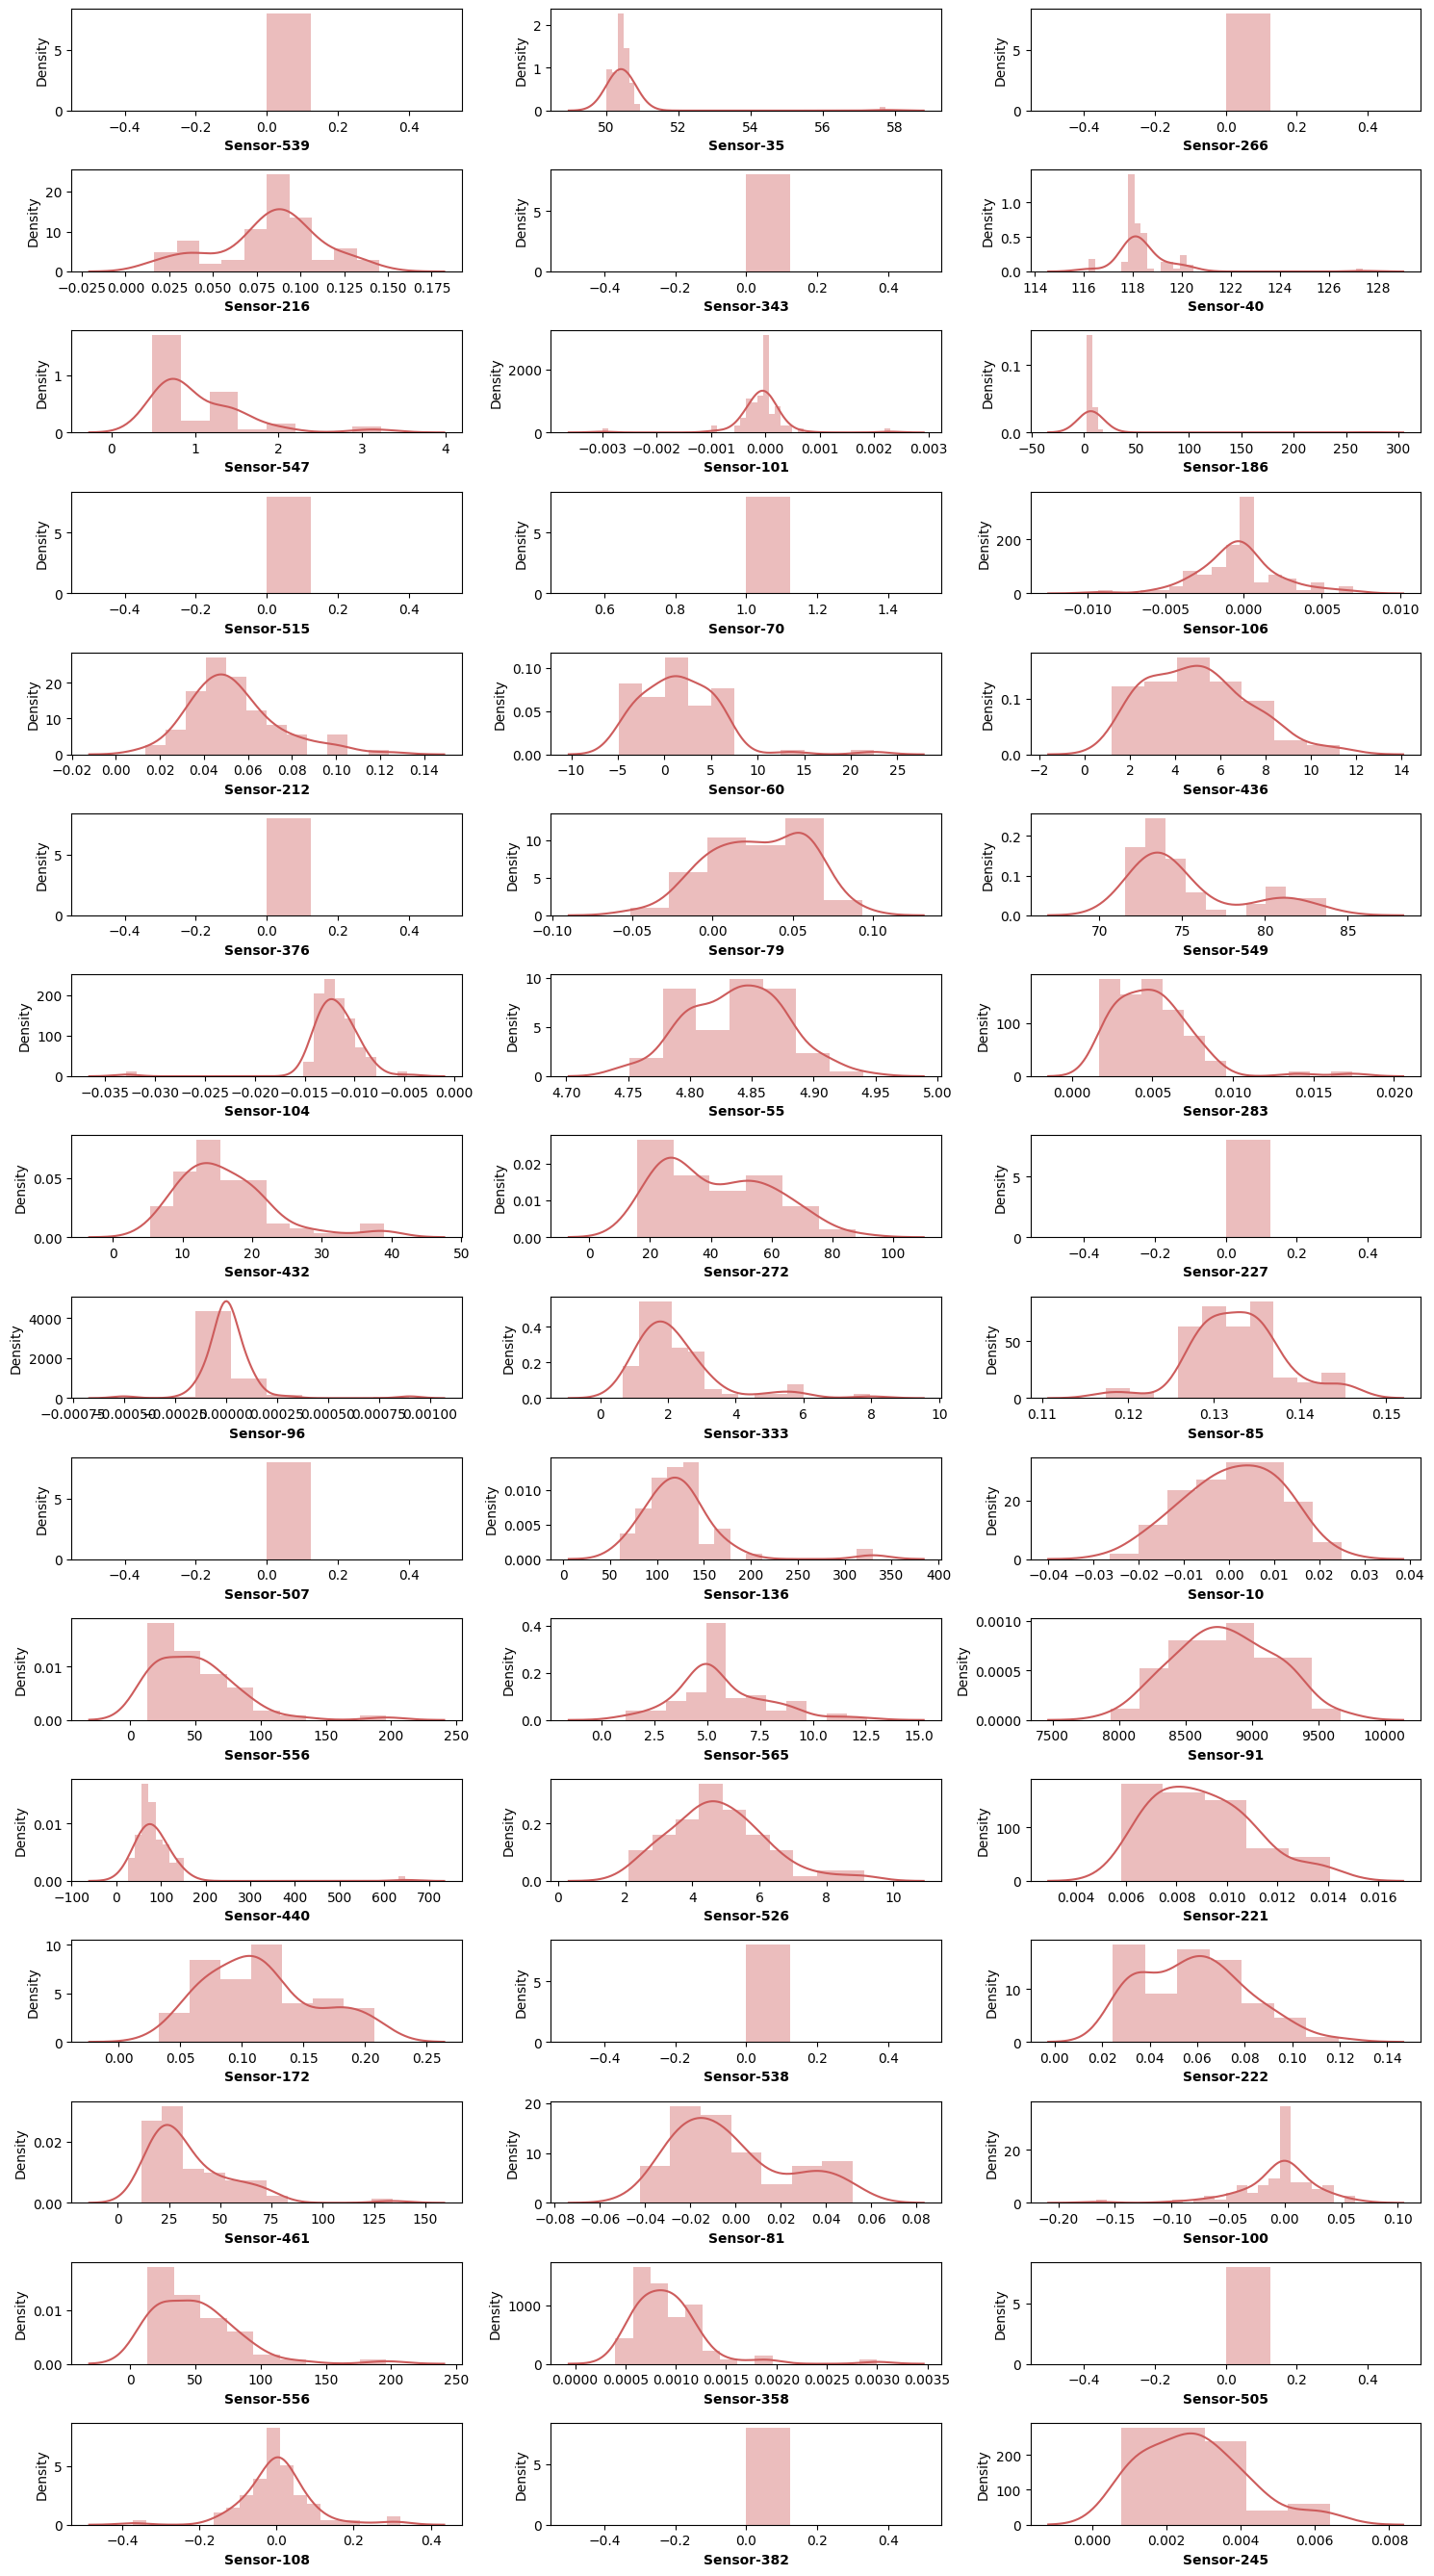

In [18]:
plt.figure(figsize=(15,100))

for i ,col in enumerate(wafers.columns[random_50_sensors_idx]):
    plt.subplot(60,3,i+1)
    sns.distplot(x=wafers[col],color='indianred')
    plt.xlabel(col,weight='bold')
    plt.tight_layout()

insight

pretty good amount of them (either first 50 or random 50) either are constant(have 0 standard deviation) or have left skewness and right skewness.it ain't possible to analyzeeach feature and deal with its outliers individually. thus we oughta depend upon the scalling.

for the feature with 0 standard deviation. we can straight away drop them and for others that do have outliers, we gotta go ahead with the Robust scalling

## get columns to drop 

### will drop columns with zero standard deviation as they are not influencing the target variable in any way

In [19]:
def get_cols_with_zero_std_dev(df: pd.DataFrame):
    """
    Returns a list of columns names who are having zero standard deviation.
    """
    cols_to_drop = []
    num_cols = [col for col in df.columns if df[col].dtype !='O'] #numerical cols only
    for col in num_cols:
        if df[col].std()==0:
            cols_to_drop.append(col)
    return cols_to_drop

def get_redundant_cols(df: pd.DataFrame, missing_thresh=.7):
    """
    Returns a list of columns having missing values more than certain thresh.
    """
    cols_missing_ratios = df.isna().sum().div(df.shape[0])
    cols_to_drop = list(cols_missing_ratios[cols_missing_ratios > missing_thresh].index)
    return cols_to_drop



In [20]:
wafers.head()

,Wafer,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
55,Wafer-856,NaN,2532.45,2191.1333,2197.6570,1.1569,100.0,89.7222,0.1251,1.5762,...,NaN,0.4936,0.0113,0.0033,2.2874,0.0133,0.0139,0.0038,104.3034,-1
88,Wafer-889,3221.21,2391.20,2189.9667,1046.6212,0.8662,100.0,102.3622,0.1208,1.4756,...,NaN,0.4940,0.0123,0.0033,2.4860,0.0280,0.0078,0.0022,27.7601,-1
26,Wafer-827,2951.85,2525.00,2189.5777,1320.3197,1.3459,100.0,100.7744,0.1234,1.5590,...,53.8577,0.5025,0.0178,0.0045,3.5361,0.0286,0.0154,0.0056,53.8577,-1
42,Wafer-843,2982.07,2447.06,2199.6334,1242.8420,1.4083,100.0,99.2178,0.1221,1.4542,...,NaN,0.4993,0.0151,0.0038,3.0214,0.0117,0.0262,0.0089,223.1018,-1
69,Wafer-870,3058.08,2524.60,2192.3778,1110.5453,0.8147,100.0,99.2922,0.1226,1.4958,...,24.6547,0.4974,0.0171,0.0040,3.4352,0.0218,0.0054,0.0020,24.6547,-1


In [21]:
## Columns w missing vals more than 70%

cols_to_drop_1 = get_redundant_cols(wafers,missing_thresh=.7)
cols_to_drop_1

['Sensor-158', 'Sensor-159', 'Sensor-293', 'Sensor-294']

In [22]:
## Columns w 0 standard Deviation
cols_to_drop_2 = get_cols_with_zero_std_dev(df=wafers)
cols_to_drop_2.append("wafer")
cols_to_drop_2

['Sensor-6',
 'Sensor-14',
 'Sensor-43',
 'Sensor-50',
 'Sensor-53',
 'Sensor-70',
 'Sensor-75',
 'Sensor-98',
 'Sensor-142',
 'Sensor-150',
 'Sensor-179',
 'Sensor-180',
 'Sensor-187',
 'Sensor-190',
 'Sensor-191',
 'Sensor-192',
 'Sensor-193',
 'Sensor-194',
 'Sensor-195',
 'Sensor-207',
 'Sensor-210',
 'Sensor-227',
 'Sensor-230',
 'Sensor-231',
 'Sensor-232',
 'Sensor-233',
 'Sensor-234',
 'Sensor-235',
 'Sensor-236',
 'Sensor-237',
 'Sensor-238',
 'Sensor-241',
 'Sensor-242',
 'Sensor-243',
 'Sensor-244',
 'Sensor-257',
 'Sensor-258',
 'Sensor-259',
 'Sensor-260',
 'Sensor-261',
 'Sensor-262',
 'Sensor-263',
 'Sensor-264',
 'Sensor-265',
 'Sensor-266',
 'Sensor-267',
 'Sensor-277',
 'Sensor-285',
 'Sensor-314',
 'Sensor-315',
 'Sensor-316',
 'Sensor-323',
 'Sensor-326',
 'Sensor-327',
 'Sensor-328',
 'Sensor-329',
 'Sensor-330',
 'Sensor-331',
 'Sensor-343',
 'Sensor-348',
 'Sensor-365',
 'Sensor-370',
 'Sensor-371',
 'Sensor-372',
 'Sensor-373',
 'Sensor-374',
 'Sensor-375',
 'Se

In [23]:
#Cols to drop
cols_to_drop = cols_to_drop_1 + cols_to_drop_2

separate Features and labels out:

In [25]:
## separate features and labels out 
X,y = wafers.drop(cols_to_drop,axis=1,errors='ignore'),wafers[["Good/Bad"]] 
#X,y = wafers.drop(cols_to_drop,axis=1),wafers['Good/Bad']

In [26]:
print(wafers.columns)  # Check available column names


Index(['Wafer', 'Sensor-1', 'Sensor-2', 'Sensor-3', 'Sensor-4', 'Sensor-5',
       'Sensor-6', 'Sensor-7', 'Sensor-8', 'Sensor-9',
       ...
       'Sensor-582', 'Sensor-583', 'Sensor-584', 'Sensor-585', 'Sensor-586',
       'Sensor-587', 'Sensor-588', 'Sensor-589', 'Sensor-590', 'Good/Bad'],
      dtype='object', length=592)


In [27]:
print(cols_to_drop)


['Sensor-158', 'Sensor-159', 'Sensor-293', 'Sensor-294', 'Sensor-6', 'Sensor-14', 'Sensor-43', 'Sensor-50', 'Sensor-53', 'Sensor-70', 'Sensor-75', 'Sensor-98', 'Sensor-142', 'Sensor-150', 'Sensor-179', 'Sensor-180', 'Sensor-187', 'Sensor-190', 'Sensor-191', 'Sensor-192', 'Sensor-193', 'Sensor-194', 'Sensor-195', 'Sensor-207', 'Sensor-210', 'Sensor-227', 'Sensor-230', 'Sensor-231', 'Sensor-232', 'Sensor-233', 'Sensor-234', 'Sensor-235', 'Sensor-236', 'Sensor-237', 'Sensor-238', 'Sensor-241', 'Sensor-242', 'Sensor-243', 'Sensor-244', 'Sensor-257', 'Sensor-258', 'Sensor-259', 'Sensor-260', 'Sensor-261', 'Sensor-262', 'Sensor-263', 'Sensor-264', 'Sensor-265', 'Sensor-266', 'Sensor-267', 'Sensor-277', 'Sensor-285', 'Sensor-314', 'Sensor-315', 'Sensor-316', 'Sensor-323', 'Sensor-326', 'Sensor-327', 'Sensor-328', 'Sensor-329', 'Sensor-330', 'Sensor-331', 'Sensor-343', 'Sensor-348', 'Sensor-365', 'Sensor-370', 'Sensor-371', 'Sensor-372', 'Sensor-373', 'Sensor-374', 'Sensor-375', 'Sensor-376', 

In [28]:
wafers.rename(columns={"Wafer": "wafer"}, inplace=True)


In [29]:
## dependent feature variables
print("Shape of the features now:",X.shape)
X.head()

Shape of the features now: (80, 466)


,Wafer,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
55,Wafer-856,NaN,2532.45,2191.1333,2197.6570,1.1569,89.7222,0.1251,1.5762,0.0028,...,NaN,0.4936,0.0113,0.0033,2.2874,0.0133,0.0139,0.0038,104.3034,-1
88,Wafer-889,3221.21,2391.20,2189.9667,1046.6212,0.8662,102.3622,0.1208,1.4756,-0.0025,...,NaN,0.4940,0.0123,0.0033,2.4860,0.0280,0.0078,0.0022,27.7601,-1
26,Wafer-827,2951.85,2525.00,2189.5777,1320.3197,1.3459,100.7744,0.1234,1.5590,-0.0032,...,53.8577,0.5025,0.0178,0.0045,3.5361,0.0286,0.0154,0.0056,53.8577,-1
42,Wafer-843,2982.07,2447.06,2199.6334,1242.8420,1.4083,99.2178,0.1221,1.4542,0.0142,...,NaN,0.4993,0.0151,0.0038,3.0214,0.0117,0.0262,0.0089,223.1018,-1
69,Wafer-870,3058.08,2524.60,2192.3778,1110.5453,0.8147,99.2922,0.1226,1.4958,0.0004,...,24.6547,0.4974,0.0171,0.0040,3.4352,0.0218,0.0054,0.0020,24.6547,-1


## Data Transformation:

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
#from sklearn.preprocessing import standarsscaler


imputer = KNNImputer(n_neighbors=3)
preprocessing_pipeline = Pipeline(
    steps=[('Imputer',imputer),('scaler',RobustScaler())])
preprocessing_pipeline

Pipeline(steps=[('Imputer', KNNImputer(n_neighbors=3)),
                ('scaler', RobustScaler())])

In [33]:
X.head(5)

,Wafer,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
55,Wafer-856,NaN,2532.45,2191.1333,2197.6570,1.1569,89.7222,0.1251,1.5762,0.0028,...,NaN,0.4936,0.0113,0.0033,2.2874,0.0133,0.0139,0.0038,104.3034,-1
88,Wafer-889,3221.21,2391.20,2189.9667,1046.6212,0.8662,102.3622,0.1208,1.4756,-0.0025,...,NaN,0.4940,0.0123,0.0033,2.4860,0.0280,0.0078,0.0022,27.7601,-1
26,Wafer-827,2951.85,2525.00,2189.5777,1320.3197,1.3459,100.7744,0.1234,1.5590,-0.0032,...,53.8577,0.5025,0.0178,0.0045,3.5361,0.0286,0.0154,0.0056,53.8577,-1
42,Wafer-843,2982.07,2447.06,2199.6334,1242.8420,1.4083,99.2178,0.1221,1.4542,0.0142,...,NaN,0.4993,0.0151,0.0038,3.0214,0.0117,0.0262,0.0089,223.1018,-1
69,Wafer-870,3058.08,2524.60,2192.3778,1110.5453,0.8147,99.2922,0.1226,1.4958,0.0004,...,24.6547,0.4974,0.0171,0.0040,3.4352,0.0218,0.0054,0.0020,24.6547,-1


In [38]:
wafers.isna().sum()

wafer         0
Sensor-1      1
Sensor-2      0
Sensor-3      2
Sensor-4      2
             ..
Sensor-587    0
Sensor-588    0
Sensor-589    0
Sensor-590    0
Good/Bad      0
Length: 592, dtype: int64

In [39]:
for col in wafers.columns:
    if wafers[col].isna().sum() > 0:
        if wafers[col].dtype == 'float64' or wafers[col].dtype == 'int64':
            wafers[col].fillna(wafers[col].mean(),inplace=True)
        else:
            wafers[col].fillna(wafers[col].median(),inplace=True)

In [42]:
wafers.isna().sum()

wafer         0
Sensor-1      0
Sensor-2      0
Sensor-3      0
Sensor-4      0
             ..
Sensor-587    0
Sensor-588    0
Sensor-589    0
Sensor-590    0
Good/Bad      0
Length: 592, dtype: int64

In [43]:
print(X.dtypes)

Wafer          object
Sensor-1      float64
Sensor-2      float64
Sensor-3      float64
Sensor-4      float64
               ...   
Sensor-587    float64
Sensor-588    float64
Sensor-589    float64
Sensor-590    float64
Good/Bad        int64
Length: 466, dtype: object


In [47]:
X = X.select_dtypes(include=['number'])  # Remove non-numeric columns
X_trans = preprocessing_pipeline.fit_transform(X)
print("Shape of transformed features set:",X_trans.shape)
X_trans

Shape of transformed features set: (80, 465)


array([[-0.02781221,  0.37395233, -0.4289214 , ...,  0.        ,
         0.75955556,  0.        ],
       [ 2.50431022, -1.38644649, -0.47986463, ..., -0.51612903,
        -0.52610857,  0.        ],
       [-0.60204699,  0.28110298, -0.49685153, ...,  0.58064516,
        -0.08775867,  0.        ],
       ...,
       [-0.03223295,  0.21779093,  1.03590393, ...,  0.12903226,
        -0.17805529,  0.        ],
       [ 0.03396281,  0.87459106,  0.53517467, ...,  0.29032258,
         0.28421459,  0.        ],
       [ 0.86164048,  0.3813055 , -0.59146288, ..., -0.16129032,
        -0.20782888,  0.        ]], shape=(80, 465))

# shell we cluster "Wafers" instances?


In [48]:
%pip install kneed

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at d:\bhavesh\ml_project\spam_detection_project\venv\lib\site-packages\fault_detection-1.0.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [50]:
from sklearn.cluster import KMeans
from kneed import KneeLocator
from typing import Tuple
from dataclasses import dataclass

@dataclass
class ClusterDataInstances:
    """
    Divides the given data instances into different clusters via KMeans Clustering algorithm

    Args:
        X(np.array): Takes in an array which gotta be clustered.
        desc(str): Description of the said array.
    """
    X: np.array
    desc: str

    def _get_ideal_number_of_clusters(self):
        """Returns the ideal number of clusters the given data instances should be divided into by
        locating the dispersal point in number of clusters vs WCSS plot.

        raises:
            e: Raises relevant exception should any kind a errro pops up while determining the ideal 
            number of clusters.

        returns:
            int:Ideal number of clusters the given data instances should be divided into.
        
        """
        try:
            print(f'Getting the ideal number of cluster to cluster "{self.desc} set" into..')
            ####################################### compute WCSS for shortlisted number of clusters ######################
            print("computing WCSS for shrotlisted number of clusters..")
            wcss = [] # Within Summation of squares
            for i in range(1,11):
                kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
                kmeans.fit(self.X)
                wcss.append(kmeans.inertia_)
                print(f'WCSS for n_clusters={i}:{kmeans.inertia_}')
            print("WCSS computed successfully for all shrotlisted number of clusters!")

            ######################################## FInalize dispersal point as the ideal number of clusters ####################

            print("finding the ideal number of clusters (by locating the dispersal point) via Elbow method..")
            knee_finder = KneeLocator(
                range(1,11),wcss, curve='convex',direction='decreasing')
            print(f"Ideal number of clusters to be formed: {knee_finder.knee}")

            return knee_finder.knee
            ...
        except Exception as e:
            print(e)
            raise e
        
    def create_clusters(self) -> Tuple:
        """Divides the given data instances into the different clusters,they first hand should've been divided into
        via offcourse kmeans Clustering algorithm.
        raises:
            e:Raises relevant exception should any kind a error pops up while dividing the given data instances into
            clusters.
            returns:
                (KMeans,np.array): KMeans Clustering object being used to cluster the given data instances and the given data:
                along with the cluster labels,respectively.
      
        """
        try:
            ideal_clusters = self._get_ideal_number_of_clusters()
            print(f"Dividing the \"{self.desc}\" instances into {ideal_clusters} clusters via KMeans Clustring algorithm. .")

            kmeans = KMeans(n_clusters=ideal_clusters,init='k-means++',random_state=42)

            y_means = kmeans.fit_predict(self.X)
            print(f"..said data instances divided into {ideal_clusters} clusters successfully!")

            return kmeans,np.c_[self.X,y_means]
        except Exception as e:
            print(e)
            raise e

In [51]:
cluster_wafers = ClusterDataInstances(X=X_trans,desc="wafers features")
clusterer, X_clus = cluster_wafers.create_clusters()
X_clus

Getting the ideal number of cluster to cluster "wafers features set" into..
computing WCSS for shrotlisted number of clusters..
WCSS for n_clusters=1:7157148.928067336
WCSS for n_clusters=2:2060306.1634277874
WCSS for n_clusters=3:1075227.480090585
WCSS for n_clusters=4:530517.1820611968
WCSS for n_clusters=5:485669.81620624167
WCSS for n_clusters=6:437364.96477712144
WCSS for n_clusters=7:226364.96063604523
WCSS for n_clusters=8:190022.6930221619
WCSS for n_clusters=9:147066.91124266043
WCSS for n_clusters=10:108703.08733901891
WCSS computed successfully for all shrotlisted number of clusters!
finding the ideal number of clusters (by locating the dispersal point) via Elbow method..
Ideal number of clusters to be formed: 3
Dividing the "wafers features" instances into 3 clusters via KMeans Clustring algorithm. .
..said data instances divided into 3 clusters successfully!


array([[-0.02781221,  0.37395233, -0.4289214 , ...,  0.75955556,
         0.        ,  1.        ],
       [ 2.50431022, -1.38644649, -0.47986463, ..., -0.52610857,
         0.        ,  1.        ],
       [-0.60204699,  0.28110298, -0.49685153, ..., -0.08775867,
         0.        ,  1.        ],
       ...,
       [-0.03223295,  0.21779093,  1.03590393, ..., -0.17805529,
         0.        ,  0.        ],
       [ 0.03396281,  0.87459106,  0.53517467, ...,  0.28421459,
         0.        ,  1.        ],
       [ 0.86164048,  0.3813055 , -0.59146288, ..., -0.20782888,
         0.        ,  1.        ]], shape=(80, 466))

In [52]:
import numpy as np

In [53]:
## clusters
np.unique(X_clus[:, -1])

array([0., 1., 2.])

So the dataset was divided into 3 optimal clusters.

Let's have a look at their shapes...

In [55]:
## Configure "Clustered" array along with target features
wafers_clus = np.c_[X_clus,y]

## Cluster_1 data
wafers_1 = wafers_clus[wafers_clus[:, -2] == 0]
wafers_1.shape

(17, 467)

Perhaps we were wrong about dividing the wafers dataset into clusters, as we can see pretty much of all datapoints lie in the first cluster itself.

Let's take look at another clusters anyway

In [57]:
# Cluster_2 data
wafers_clus[wafers_clus[:, -2] == 1].shape

(62, 467)

Man , Seriously?!

In [58]:
## Cluster_3 data
wafers_clus[wafers_clus[:, -2] ==2].shape

(1, 467)

=> Thus we mustn't divide the dataset into Cluster .Not a good idea!

# Resampling of Training instances:

Resampling is imperative in this case as the target variable is highly imbalanced.

In [60]:
%pip install imbalanced-learn

DEPRECATION: Loading egg at d:\bhavesh\ml_project\spam_detection_project\venv\lib\site-packages\fault_detection-1.0.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [61]:
from imblearn.combine import SMOTETomek
X ,y = X_trans[:,:-1],y
resampler = SMOTETomek(sampling_strategy='auto')
X_res,y_res = resampler.fit_resample(X,y)

In [62]:
print("Before resampling , shape of training instances:",np.c_[X,y].shape)
print("After resampling, Shape of training instances:",np.c_[X_res,y_res].shape)

Before resampling , shape of training instances: (80, 465)
After resampling, Shape of training instances: (148, 465)


In [63]:
## Target cats after Resampling
print(np.unique(y_res))
print(f"value counts: \n-1:{len(y_res[y_res == -1])},1:{len(y_res[y_res == 1])}")

[-1  1]
value counts: 
-1:148,1:148


=> Exactly what we wanted!

# Prepare the Test set:

Do exactly the same to test set whatever's been done to the test set.

In [64]:
from sklearn.model_selection import train_test_split

X_train ,X_test , y_train,y_test = train_test_split(X_res,y_res,test_size=1/3,random_state=42)

print(f"train set:{X_train.shape,y_train.shape}")
print(f"test set:{X_test.shape,y_test.shape}")

train set:((98, 464), (98, 1))
test set:((50, 464), (50, 1))


# Model Selection and Training:

In [65]:
%pip install xgboost==0.90


   ---------------------------------------- 0.0/18.3 MB ? eta -:--:--
   -- ------------------------------------- 1.0/18.3 MB 8.4 MB/s eta 0:00:03
   -- ------------------------------------- 1.3/18.3 MB 3.0 MB/s eta 0:00:06
   ---- ----------------------------------- 2.1/18.3 MB 4.1 MB/s eta 0:00:05
   ------ --------------------------------- 2.9/18.3 MB 3.4 MB/s eta 0:00:05
   ------- -------------------------------- 3.4/18.3 MB 3.2 MB/s eta 0:00:05
   --------- ------------------------------ 4.2/18.3 MB 3.6 MB/s eta 0:00:04
   --------- ------------------------------ 4.2/18.3 MB 3.6 MB/s eta 0:00:04
   --------- ------------------------------ 4.2/18.3 MB 3.6 MB/s eta 0:00:04
   --------- ------------------------------ 4.2/18.3 MB 3.6 MB/s eta 0:00:04
   --------- ------------------------------ 4.5/18.3 MB 2.1 MB/s eta 0:00:07
   ----------- ---------------------------- 5.2/18.3 MB 2.3 MB/s eta 0:00:06
   ------------- -------------------------- 6.3/18.3 MB 2.5 MB/s eta 0:00:05
   --

DEPRECATION: Loading egg at d:\bhavesh\ml_project\spam_detection_project\venv\lib\site-packages\fault_detection-1.0.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [66]:
X_prep = X_train
y_prep = y_train
X_test_prep = X_test
y_test_prep = y_test

print(X_prep.shape, y_prep.shape)
print(X_test_prep.shape,y_test_prep.shape)

(98, 464) (98, 1)
(50, 464) (50, 1)


In [67]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score

#shortlisted base models
svc_clf = SVC(kernel='linear')
svc_rbf_clf = SVC(kernel='rbf')
random_clf = RandomForestClassifier(random_state=42)
xgb_clf = XGBClassifier(objective='binary:logistic')

In [68]:
## A function to display Scores

def display_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Standard Deviation:",scores.std())

#Evaluating svc (kernel ='linear) using cross-validation:

In [73]:
## Svc Scores
svc_Scores = cross_val_score(svc_clf,X_prep,y_prep,scoring='roc_auc',cv=10,verbose=2)

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


In [74]:
display_scores(svc_Scores)

Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean: 1.0
Standard Deviation: 0.0


In [75]:
## performance on test set using cross-validation

#predictions using cross-validation
svc_preds = cross_val_predict(svc_clf,X_test_prep,y_test_prep,cv=5)

#AUC scores

svc_auc = roc_auc_score(y_test_prep,svc_preds)
svc_auc

np.float64(0.94)

# #Evaluating svc (kernel='rbf) using cross-validation:

In [76]:
## SVC rbf Scores
svc_rbf_scores = cross_val_score(svc_rbf_clf,X_prep,y_prep,scoring='roc_auc',cv=10,verbose=2)

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


In [77]:
display_scores(svc_rbf_scores)

Scores: [1.   0.96 0.52 1.   1.   1.   0.96 1.   1.   1.  ]
Mean: 0.944
Standard Deviation: 0.14221111067704942


In [78]:
#Performance on test set using cross-validation

#Prediction using cross-validation
svc_rbf_preds = cross_val_predict(svc_rbf_clf,X_test_prep,y_test_prep,cv=5)

#Auc score
svc_rbf_auc = roc_auc_score(y_test_prep,svc_rbf_preds)

svc_rbf_auc

np.float64(0.6799999999999999)

# #Evaluating Randomforestclassifier using cross-validation:

In [80]:
## Random forest scores

random_clf_scores = cross_val_score(random_clf,X_prep,y_prep,scoring='roc_auc',cv=10,verbose=2)

[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


In [81]:
display_scores(random_clf_scores)

Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean: 1.0
Standard Deviation: 0.0


In [82]:
## Performance on test set using cross-validation

#predictions using cross-validation
random_clf_preds = cross_val_predict(random_clf,X_test_prep,y_test_prep,cv=5)

#AUC score
random_clf_auc = roc_auc_score(y_test_prep,random_clf_preds)
random_clf_auc

np.float64(0.96)